In [1]:
import os
from glob import glob
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import VGG16
from keras.models import Model

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
imageSize=128
train_dir = "/content/drive/MyDrive/VASU/Train"
test_dir =  "/content/drive/MyDrive/VASU/Test"
# ['DME', 'CNV', 'NORMAL', '.DS_Store', 'DRUSEN']
from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['Mild']:
                label = 1
            elif folderName in ['Moderate']:
                label = 2
            elif folderName in ['Severe']:
                label = 3
            else:
                label = 4
  
            for image_filename in tqdm(os.listdir(folder + '/'+folderName)):
                

                img_file = cv2.imread(folder + '/'+folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                   
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)

    return X,y
X_train, y_train = get_data(train_dir) # Un-comment to use full dataset: Step 1 of 2
X_test, y_test= get_data(test_dir)
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 4)
y_testHot = to_categorical(y_test, num_classes = 4)

FileNotFoundError: ignored

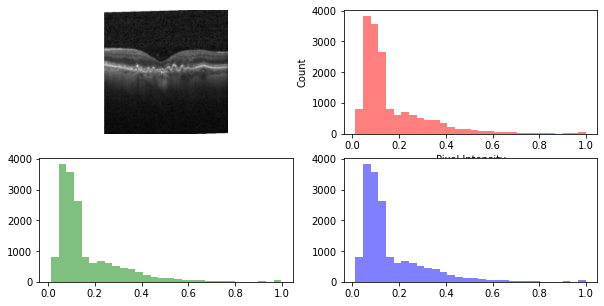

In [ ]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.subplot(2,2,3)
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.subplot(2,2,4)
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[1])

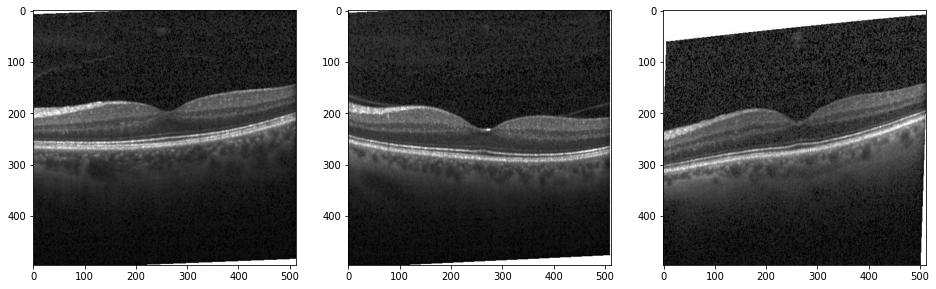

In [ ]:
# Visualizing Images of Training set

multipleImages = glob('/content/drive/MyDrive/OCT/Train/NORMAL/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(r[2])); 
plotThreeImages(multipleImages)

Normal


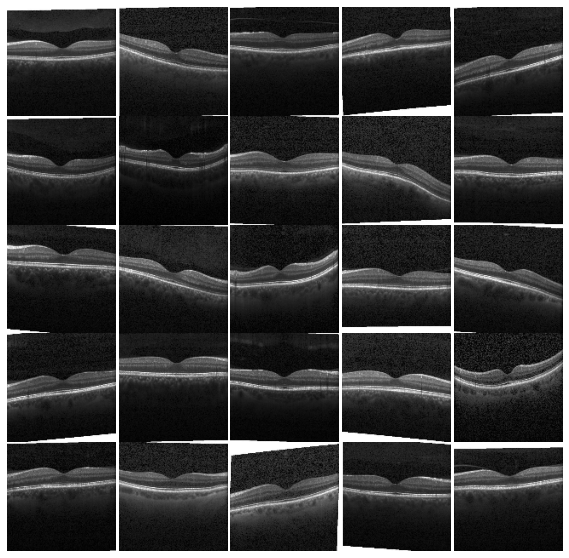

In [ ]:
print("Normal")
multipleImages = glob('/content/drive/MyDrive/OCT/Train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

CNV


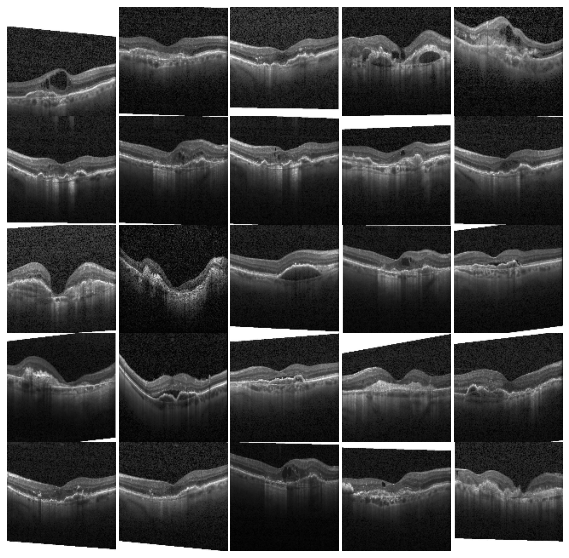

In [ ]:
print("CNV")
multipleImages = glob('/content/drive/MyDrive/OCT/Train/CNV/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_+=1

DME


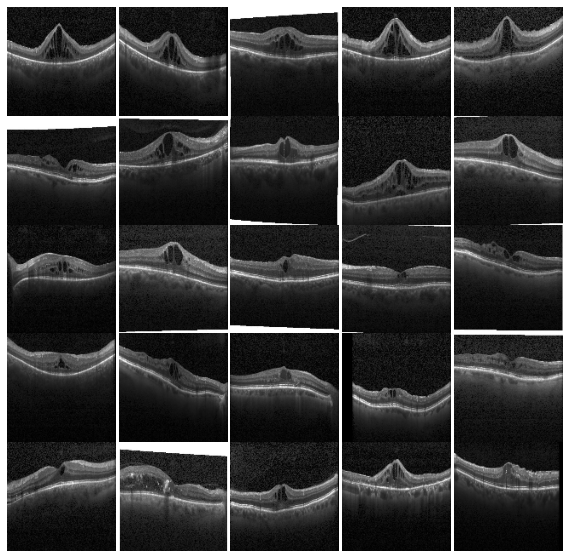

In [ ]:
print("DME")
multipleImages = glob('/content/drive/MyDrive/OCT/Train/DME/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_+=1

In [ ]:
''' VGGNET19 Model '''
model1 = tf.keras.applications.VGG16(input_shape=(128,128,3),include_top=False,weights='imagenet',pooling='avg')

''' freezing layers '''
model1.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Activation,Dense, Dropout, Flatten

In [ ]:
folders = glob('/content/drive/MyDrive/OCT/Train/*')
# our layers - you can add more if you want
x = Flatten()(model1.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=model1.input, outputs=prediction)

In [ ]:
#optimizer1=keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
#callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/OCT/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/OCT/Test',
                                            target_size = (224, 224),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 968 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
61/61 [==============================] - 15s 243ms/step - loss: 1.1155 - accuracy: 0.6746 - val_loss: 1.0754 - val_accuracy: 0.7125
Epoch 2/30
61/61 [==============================] - 15s 242ms/step - loss: 1.0524 - accuracy: 0.7355 - val_loss: 1.0151 - val_accuracy: 0.7625
Epoch 3/30
61/61 [==============================] - 15s 250ms/step - loss: 0.9989 - accuracy: 0.7438 - val_loss: 0.9759 - val_accuracy: 0.7500
Epoch 4/30
61/61 [==============================] - 15s 243ms/step - loss: 0.9597 - accuracy: 0.7459 - val_loss: 0.9461 - val_accuracy: 0.7000
Epoch 5/30
61/61 [==============================] - 15s 246ms/step - loss: 0.9242 - accuracy: 0.7614 - val_loss: 0.9086 - val_accuracy: 0.7000
Epoch 6/30
61/61 [==============================] - 15s 248ms/step - loss: 0.8884 - accuracy: 0.7593 - val_loss: 0.8563 - val_accuracy: 0.7625
Epoch 7/30
61/61 [==============================] - 15s 246ms/step - loss: 0.8595 - accuracy: 0.7727 - val_loss: 0.8269 - val_accuracy: 0.7750

In [ ]:
# Evaluate model
score = model.evaluate(test_set,verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')


Keras CNN - accuracy: 0.824999988079071 



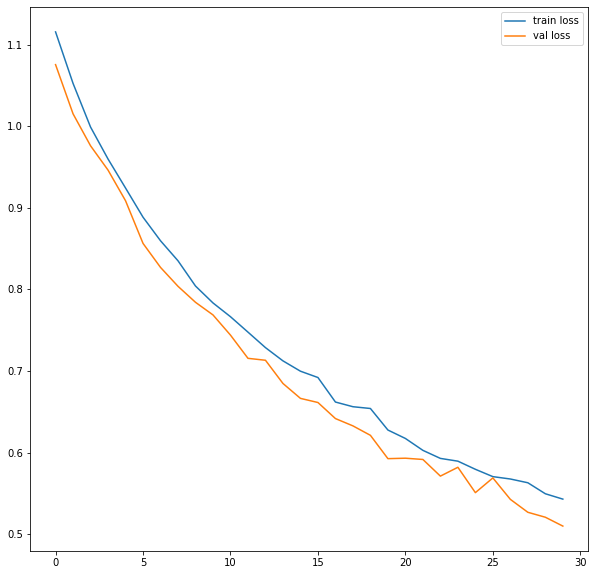

<Figure size 720x720 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

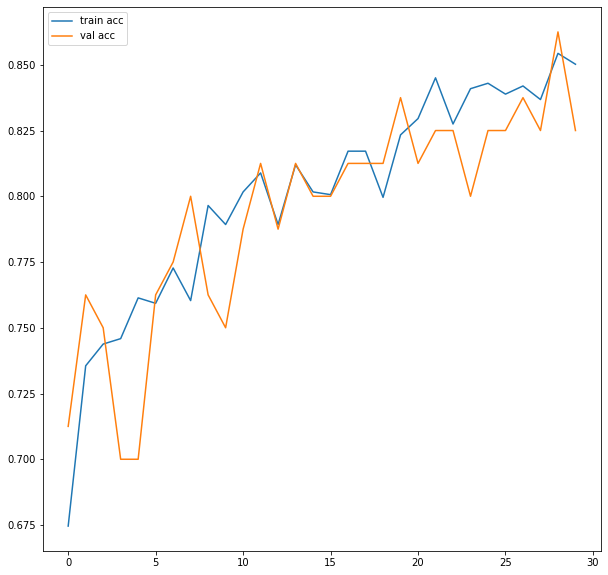

<Figure size 720x720 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
Y_pred=model.predict(test_set)
y_pred=np.argmax(Y_pred,axis=1)


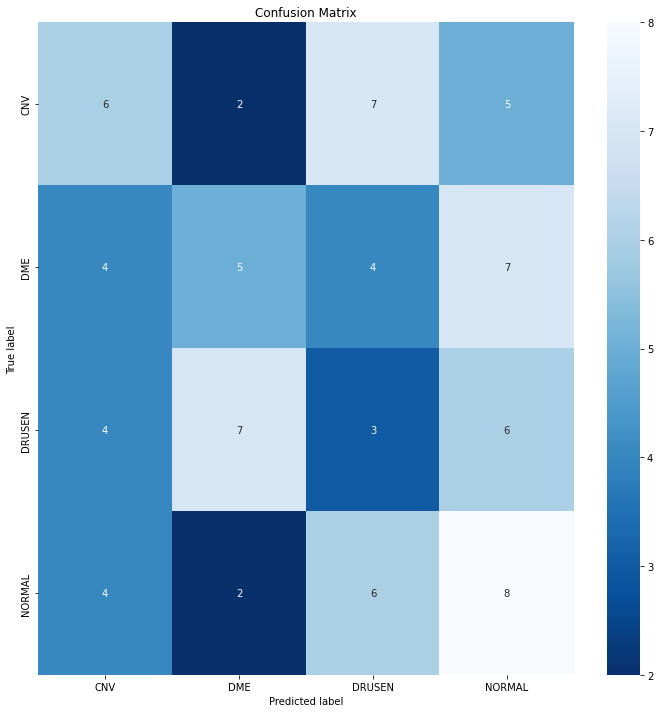

In [ ]:
cm=confusion_matrix(test_set.classes,y_pred)
f=plt.figure(figsize=(12,12))
f = sns.heatmap(cm, annot=True, fmt='d',cmap='Blues_r')

f.set_xlabel('Predicted label');f.set_ylabel('True label'); 
f.set_title('Confusion Matrix'); 
f.xaxis.set_ticklabels(['CNV','DME','DRUSEN','NORMAL']); f.yaxis.set_ticklabels(['CNV','DME','DRUSEN','NORMAL']);

############################################################   Extracting Intemediate Layers #####################

In [ ]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
### Getting names of convolutional layers and their output shapes
i=0
for layer in model1.layers:
  i+=1
  if 'conv' not in layer.name:
    continue
  filters,biases=layer.get_weights()
  print("layer number - {}   layer Name  - {}    Shape - {}".format(i-1,layer.name,filters.shape))


layer number - 1   layer Name  - block1_conv1    Shape - (3, 3, 3, 64)
layer number - 2   layer Name  - block1_conv2    Shape - (3, 3, 64, 64)
layer number - 4   layer Name  - block2_conv1    Shape - (3, 3, 64, 128)
layer number - 5   layer Name  - block2_conv2    Shape - (3, 3, 128, 128)
layer number - 7   layer Name  - block3_conv1    Shape - (3, 3, 128, 256)
layer number - 8   layer Name  - block3_conv2    Shape - (3, 3, 256, 256)
layer number - 9   layer Name  - block3_conv3    Shape - (3, 3, 256, 256)
layer number - 11   layer Name  - block4_conv1    Shape - (3, 3, 256, 512)
layer number - 12   layer Name  - block4_conv2    Shape - (3, 3, 512, 512)
layer number - 13   layer Name  - block4_conv3    Shape - (3, 3, 512, 512)
layer number - 15   layer Name  - block5_conv1    Shape - (3, 3, 512, 512)
layer number - 16   layer Name  - block5_conv2    Shape - (3, 3, 512, 512)
layer number - 17   layer Name  - block5_conv3    Shape - (3, 3, 512, 512)


In [ ]:
#Extracting specific layer output

In [ ]:
from keras.models import Model


In [ ]:
#Extracting convolution layer1 output
conv_1_output=Model(inputs=model1.inputs,outputs=model1.layers[2].output)
conv_1_output.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________


In [ ]:
#preprocessing image
def pre_process(img):
  img=img_to_array(img)
  img=img/255.0
  img=np.expand_dims(img,axis=0)
  return img

#Plotting Intermediate Layers output
def plot_intermediate(f_maps):
  s=8
  ix=1
  ax=pyplot.figure(figsize=(18,8))
  for i in range(s):
    for j in range(s):
      ax=pyplot.subplot(s,s,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(f_maps[0,:,:,ix-1],aspect='auto',cmap='hot')
      ix+=1


In [ ]:
img=load_img("/content/drive/MyDrive/OCT/Test/DME/DME-269181-1.jpeg",target_size=(128,128))
f_maps=conv_1_output.predict(pre_process(img))

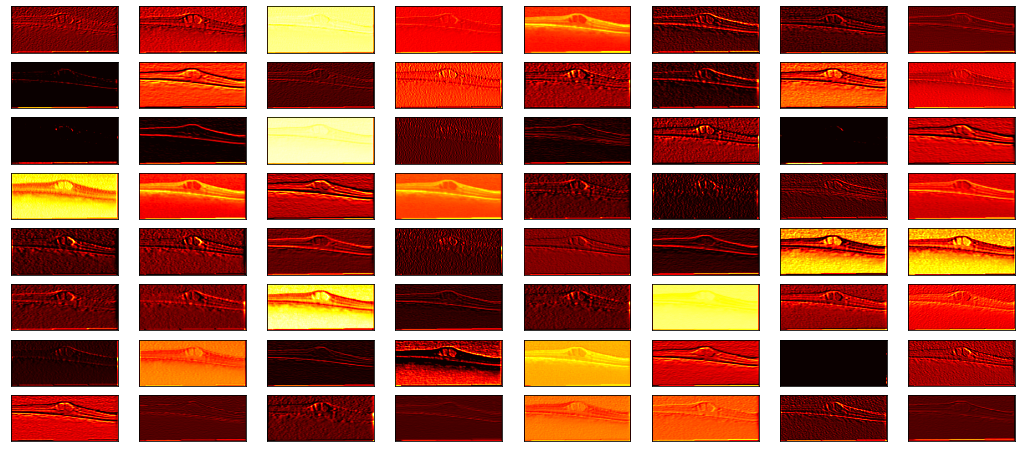

In [ ]:
plot_intermediate(f_maps)

In [ ]:
#Extracting convoltuional output conv layer 5
conv_1_output_2=Model(inputs=model1.inputs,outputs=model1.layers[5].output)
conv_1_output_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
Total params: 260,160
Trainable params: 0
Non-trainable par

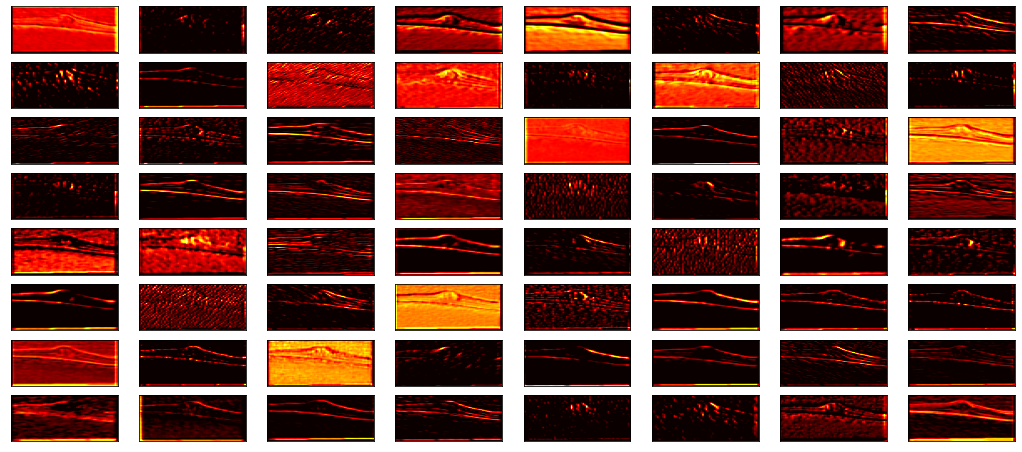

In [ ]:
img=load_img("/content/drive/MyDrive/OCT/Test/DME/DME-269181-1.jpeg",target_size=(128,128))
f_maps=conv_1_output_2.predict(pre_process(img))
plot_intermediate(f_maps)

In [ ]:
## Similarly  by changing layer number, we can view outputs of different intermediate layers